In [2]:
movie = open('movies.txt',encoding="utf8", errors='ignore')
context= movie.readlines()
print(len(context))
movie.close()

71205232


In [3]:
print(len(context)/9)

7911692.444444444


In [3]:
productId=[]
userId=[]
score =[]
review=[]
summary = []
for i in range(len(context)):
    if len(context) >1:
        temp= context[i].split(':')[0]
        if temp == "product/productId" :
            productId.append(context[i].split(':')[1][1:len(context[i].split(':')[1])-1])
        elif temp == "review/userId":
            userId.append(context[i].split(':')[1][0:len(context[i].split(':')[1])-1])
        elif temp == "review/score" :
            score.append((context[i].split(':')[1][1:4]))
        elif temp == "review/text":
            review.append(context[i][13:len(context[i])-1])
        elif temp == "review/summary":
            summary.append(context[i].split(':')[1][0:len(context[i].split(':')[1])-1])
            

score = [float(i) for i in score] 
   # print(context[i])
    #temp = context[i].split(':')
    #data[context[i].split(':')[0]]= context[i].split(':')[1:]

In [5]:
print(len(review))
print(len(productId))
print(len(userId))
print(len(score))
print(len(summary))

7911684
7911684
7911684
7911684
7911684


In [4]:
import pandas as pd
d = {'productId': productId, 'userId': userId, 'score': score,'summary':summary , 'review':review}
df = pd.DataFrame(data=d)

#df.iloc[:,2]=int(df.iloc[:,2])

In [31]:
df_new_moview=df[df.groupby("productId")['productId'].transform('size') > 800]
#not running this code 

In [32]:
top_ten_movies=df_new_moview.groupby( [ "productId"] ).size().to_frame(name = 'count').reset_index()
top_ten_movies.drop_duplicates(subset ="count", 
                     keep="last", inplace = True) 
movies_keep=top_ten_movies['productId']
new_df= df[df.productId.isin(movies_keep)]

In [19]:
new_df.to_csv("movies_with_more_than_500.csv")

In [30]:
new_df.to_csv("movies_with_more_than_600.csv")

In [33]:
new_df.to_csv("movies_with_more_than_800.csv")

In [ ]:
# more than 500 - 90k data 
# more than 600 - 61k data 
# more than 800 - 20k data 

In [15]:
len(new_df.groupby('productId')['productId'].count())

136

In [29]:
new_df.shape

(61077, 5)

In [18]:
new_df.groupby('productId')['productId'].count().min()

504

In [44]:
df_new=df[df.groupby("userId")['userId'].transform('size') > 100]

In [45]:
top_ten_movies=df_new.groupby( [ "productId"] ).size().to_frame(name = 'count').reset_index()
top_ten_movies.drop_duplicates(subset ="count", 
                     keep="last", inplace = True) 
movies_keep=top_ten_movies['productId']
new_df= df_new[df_new.productId.isin(movies_keep)]

In [46]:
new_df.shape

(30250, 5)

In [47]:
new_df.to_csv("recommend_more_than_100.csv") # 23k 

In [48]:
len(new_df.groupby('productId')['productId'].count()) # 214 movies - 150 # 241 movies - 100 

241

In [49]:
len(new_df.groupby('userId')['userId'].count()) # 3724 reviewers - 150  # 5697 reviewers - 100

5697

In [15]:
df_new_moview=df_new[df_new.groupby("productId")['productId'].transform('size') > 100]
print(df_new_moview)

          productId           userId  score  \
79       B000063W1R   A18758S1PUYIDT    4.0   
82       B000063W1R   A23Q1T4MXZHFM7    3.0   
97       B000063W1R   A3N2MVBI1A2I9Y    5.0   
99       B000063W1R   A355WMP0CQBJFX    5.0   
100      B000063W1R   A2CU4L3OK00M23    5.0   
101      B000063W1R    A41I67QYRAOSQ    4.0   
106      B000063W1R    AQ8DU6XVA3USJ    5.0   
108      B000063W1R    ALX2RTJW3NF0O    4.0   
113      B000063W1R   A1FBZRYTAA6O1Z    5.0   
114      B000063W1R   A2FEGRJQNU51P9    4.0   
116      B000063W1R   A1EMDSTJDUE6B0    5.0   
117      B000063W1R    A7FMCZZVFHRLW    4.0   
128      B000063W1R   A17WER66R17JEF    5.0   
129      B000063W1R   A2198FZZMTJ38H    5.0   
130      B000063W1R   A328S9RN3U5M68    5.0   
131      B000063W1R   A2V3P1XE33NYC3    4.0   
132      B000063W1R   A3L2U581LL17EB    4.0   
134      B000063W1R   A28ILXH590CMRJ    4.0   
135      B000063W1R   A2VOIE123XM7T5    3.0   
136      B000063W1R    ADX5JX5LKLC22    5.0   
138      B000

In [20]:
print(df_new_moview)

          productId           userId  score  \
79       B000063W1R   A18758S1PUYIDT    4.0   
82       B000063W1R   A23Q1T4MXZHFM7    3.0   
97       B000063W1R   A3N2MVBI1A2I9Y    5.0   
99       B000063W1R   A355WMP0CQBJFX    5.0   
100      B000063W1R   A2CU4L3OK00M23    5.0   
101      B000063W1R    A41I67QYRAOSQ    4.0   
106      B000063W1R    AQ8DU6XVA3USJ    5.0   
108      B000063W1R    ALX2RTJW3NF0O    4.0   
113      B000063W1R   A1FBZRYTAA6O1Z    5.0   
114      B000063W1R   A2FEGRJQNU51P9    4.0   
116      B000063W1R   A1EMDSTJDUE6B0    5.0   
117      B000063W1R    A7FMCZZVFHRLW    4.0   
128      B000063W1R   A17WER66R17JEF    5.0   
129      B000063W1R   A2198FZZMTJ38H    5.0   
130      B000063W1R   A328S9RN3U5M68    5.0   
131      B000063W1R   A2V3P1XE33NYC3    4.0   
132      B000063W1R   A3L2U581LL17EB    4.0   
134      B000063W1R   A28ILXH590CMRJ    4.0   
135      B000063W1R   A2VOIE123XM7T5    3.0   
136      B000063W1R    ADX5JX5LKLC22    5.0   
138      B000

In [42]:
top_ten_movies=df_new_moview.groupby( [ "productId"] ).size().to_frame(name = 'count').reset_index()
print(top_ten_movies)

       productId  count
0     076780192X    161
1     0767802446    109
2     0767802470    114
3     0767802489    114
4     0767802519    118
5     0767802527    118
6     0767802624    109
7     0767802659    135
8     0767805267    201
9     0767805690    121
10    0767805712    121
11    0767811038    135
12    0767811100    101
13    0767811712    101
14    0767811720    101
15    0767812778    180
16    0767817443    146
17    0767817451    146
18    0767817478    146
19    0767817974    126
20    0767824571    126
21    0767825411    146
22    0767827023    126
23    0767827031    161
24    0767830520    154
25    0767830539    154
26    0767830547    154
27    0767834720    144
28    0767834739    144
29    0767835263    109
...          ...    ...
6969  B0090XHWVS    307
6970  B0090XHWYA    157
6971  B0090XJJSC    134
6972  B0090XJJT6    406
6973  B0090XK9CC    234
6974  B0090XLDKY    163
6975  B0090XPGVG    238
6976  B009329ZF2    111
6977  B0093ICOE0    285
6978  B0095D4I8S

In [43]:
top_ten_movies.drop_duplicates(subset ="count", 
                     keep="last", inplace = True) 

In [44]:
print(top_ten_movies)

       productId  count
2680  B0000TB04G    279
3066  B0006989TE    357
3246  B0009NMSUI    268
3336  B000AMWIVM    282
3804  B000HT3Q0A    271
3927  B000ICLRIE    221
3980  B000J10EQU    391
4193  B000N6UERU    242
4234  B000NTHT6G    185
4259  B000O76T7M    277
4463  B000TCSWA4    261
4466  B000TGJ7ZY    174
4937  B0016RDEH2    350
4945  B0017H5EAQ    258
4959  B00186E254    256
5054  B001BN4WMW    228
5176  B001EL6EH2    265
5187  B001F4UHFI    152
5191  B001F6PZVM    310
5292  B001IA2PTK    383
5314  B001JNNDCY    246
5534  B001UV4XEM    143
5569  B001YV502C    229
5598  B0024NSG4I    372
5600  B0024NSG52    348
5638  B00284BNKC    194
5652  B0028OA3EY    392
5705  B002EDH5W2    280
5753  B002KGREJW    252
5772  B002M4CEZG    262
...          ...    ...
6962  B008Y6UPN4    123
6964  B008Y6YLBG    110
6966  B008Y7DWC4    141
6967  B008YI91HS    129
6968  B0090XG9US    119
6969  B0090XHWVS    307
6970  B0090XHWYA    157
6971  B0090XJJSC    134
6972  B0090XJJT6    406
6973  B0090XK9CC

In [45]:
movies_keep=top_ten_movies['productId']

In [47]:
new_df= df_new_moview[df_new_moview.productId.isin(movies_keep)]

In [49]:
new_df.shape

(39091, 5)

In [53]:
new_df.groupby('userId')['userId'].count()

userId
 A100JCBNALJFAW    14
 A100RFQHFO005W     1
 A1027EV8A9PV1O     1
 A102B8D74H64TO     3
 A102RDJLOHWS0W     2
 A102YM3H3O003E     2
 A103EXN5Q7HX6Z     2
 A103KNDW8GN92L     2
 A103QX7NUHBOUF     2
 A103W7ZPKGOCC9     2
 A105YVLAZNYQUU     6
 A105ZJZTVLUC8Q     1
 A106016KSI0YQ     10
 A106K1RIUF902A     1
 A107ZX1O8JZCN5     1
 A10872FHIJAKKD     4
 A1089V1E6BFW39     3
 A108A421PC6MH3     5
 A109LWN9DUGPDP     8
 A10A503ML6J308     1
 A10BT85QEKBZNZ     3
 A10C2SBALDLKU9     4
 A10C3IAZUXZ705     2
 A10C5CJK1YKGV0    10
 A10CJINP7KBR4W     9
 A10CNESX5YEO1B     1
 A10D3I4NV0H6E5     1
 A10DB0H2NZF11E    19
 A10DQWWRKGQ6FY     1
 A10E3F50DIUJEE     7
                   ..
 AZIZ8DF9DBFTD      6
 AZJHU77G4SDCJ      1
 AZKXH0J59TK11      2
 AZLC3D46UHOAK      1
 AZMOM619PTO5B      2
 AZMZB6YUWIBGV      1
 AZN28ZLXYIJDE      2
 AZNFKXDOLCLE9      7
 AZNQDDC78PRFL      2
 AZOO52O4MU7KX      1
 AZOW89D0NXMUT      6
 AZQ4FW0OW5VF4      1
 AZQ6PYDEJQJEF      2
 AZQ7O73EAS3VI      9
 AZ

In [50]:
new_df=pd.DataFrame(data=new_df)

In [51]:
new_df.to_csv("temp_movies.csv")

In [24]:
top_ten_movies=top_ten_movies.rename(index={0: "productId", 1: "Count"})

In [46]:
print(movies_keep)

2680    B0000TB04G
3066    B0006989TE
3246    B0009NMSUI
3336    B000AMWIVM
3804    B000HT3Q0A
3927    B000ICLRIE
3980    B000J10EQU
4193    B000N6UERU
4234    B000NTHT6G
4259    B000O76T7M
4463    B000TCSWA4
4466    B000TGJ7ZY
4937    B0016RDEH2
4945    B0017H5EAQ
4959    B00186E254
5054    B001BN4WMW
5176    B001EL6EH2
5187    B001F4UHFI
5191    B001F6PZVM
5292    B001IA2PTK
5314    B001JNNDCY
5534    B001UV4XEM
5569    B001YV502C
5598    B0024NSG4I
5600    B0024NSG52
5638    B00284BNKC
5652    B0028OA3EY
5705    B002EDH5W2
5753    B002KGREJW
5772    B002M4CEZG
           ...    
6962    B008Y6UPN4
6964    B008Y6YLBG
6966    B008Y7DWC4
6967    B008YI91HS
6968    B0090XG9US
6969    B0090XHWVS
6970    B0090XHWYA
6971    B0090XJJSC
6972    B0090XJJT6
6973    B0090XK9CC
6974    B0090XLDKY
6975    B0090XPGVG
6976    B009329ZF2
6977    B0093ICOE0
6979    B00962QYVC
6982    B009A87Z6U
6983    B009A87ZKG
6985    B009AJD5E0
6986    B009CG8YJW
6988    B009GN6DT4
6989    B009HEM65M
6990    B009

In [25]:
print(top_ten_movies)

productId
076780192X    161
0767802446    109
0767802470    114
0767802489    114
0767802519    118
0767802527    118
0767802624    109
0767802659    135
0767805267    201
0767805690    121
0767805712    121
0767811038    135
0767811100    101
0767811712    101
0767811720    101
0767812778    180
0767817443    146
0767817451    146
0767817478    146
0767817974    126
0767824571    126
0767825411    146
0767827023    126
0767827031    161
0767830520    154
0767830539    154
0767830547    154
0767834720    144
0767834739    144
0767835263    109
             ... 
B0090XHWVS    307
B0090XHWYA    157
B0090XJJSC    134
B0090XJJT6    406
B0090XK9CC    234
B0090XLDKY    163
B0090XPGVG    238
B009329ZF2    111
B0093ICOE0    285
B0095D4I8S    154
B00962QYVC    182
B009653J0S    118
B0097GUQPW    150
B009A87Z6U    212
B009A87ZKG    150
B009AGRE5O    109
B009AJD5E0    215
B009CG8YJW    144
B009GMFSXC    101
B009GN6DT4    130
B009HEM65M    106
B009JZTQOS    118
B009K5257M    109
B009L69K1O    120


IndexingError: Too many indexers

In [33]:
top_ten_movies.drop_duplicates(subset ="count", 
                     keep = False, inplace = True) 

In [35]:
print(len(top_ten_movies))

13


In [7]:
print(top_reviewers)

userId
 A16CZRQL23NOIW    10793
 A3LZGLA88K0LA0    10304
 ANCOMAI0I7LVG      9790
 A2NJO6YE954DBH     9713
 ABO2ZI2Y5DQ9T      8020
 A35ZK3M8L9JUPX     7695
 A39CX0EE4BZCZC     7659
 A10ODC971MDHV8     7548
 A328S9RN3U5M68     7448
 AJKWF4W7QD4NS      7144
 A1X054KUYG5V       6741
 A1ER6IYOMM8VCT     6703
 AIMR915K4YCN       6684
 A2EDZH51XHFA9B     6558
 A1GGOC9PVDXW7Z     6406
 A2B73CL3QSYWLB     6345
 A19ZXK9HHVRV1X     6216
 A20EEWWSFMZ1PN     6145
 A3UDYY6L2NH3JS     6134
 A1D2C0WDCSHUWZ     6032
 AWG2O9C42XW5G      5848
 A3KF4IP2MUS8QQ     5791
 A1L43KWWR05PCS     5745
 A2PV6GK1HV54Y9     5388
 AQP1VPK16SVWM      5172
 A3MV1KKHX51FYT     5056
 A370Z6I5GBWU44     4861
 AER15RIMV8E6D      4765
 A1GHUN5HXMHZ89     4545
 A220FJEQNGMSRN     4433
                   ...  
 A34D06JL7LC6MU     3108
 A152C8GYY25HAH     3100
 A3Q1FVRV0CRYTH     3094
 A6VXZ1EEPRTLV      3060
 A2AOZQ3WTNVVOK     3056
 A2A6NH6DPE0VXR     3045
 A2B3Z2QHW3V35S     3025
 A11PTCZ2FM2547     3016
 A18758S1PUYIDT   

In [62]:
top_ten_movies=df.groupby('productId')['productId'].count().nlargest(100)

In [63]:
print(top_ten_movies)

productId
B002QZ1RS6    957
B007FQDPL8    956
B00005JPS8    925
B001C08RHA    925
B001FD5KJM    925
B001GAPC1K    925
B001I1NGHY    925
B001KZG99A    925
B001FZ9AAU    924
B001HUHBE0    924
B004JMSIRC    924
B000H7I6CU    904
7883685635    902
B00005JNS0    902
B000ENV5WK    902
B000H5U832    902
B000V1Y43W    902
B002LW9ITY    902
B0049J3QF4    902
B004I654WQ    902
B004OBQDJ8    902
B005ZMUQCK    902
B000S6LS66    886
B000W494SI    886
B000W4B0Z8    886
B001DWNUE2    886
B008UBYTRG    886
B0027BOL4G    876
B002LBKDYE    876
B002UZ5CHO    876
             ... 
B004WMKSH2    832
B004WO6BPS    832
B004WO774M    832
B004WQ1LLA    832
B004WX8HFG    832
B0064ORVCQ    832
B006AM4UUS    832
B006FXJVHY    832
B008UZ7MUI    832
B001BYLFFS    830
B001D2WUAC    830
B0032CNOK6    830
B00005JNTX    829
B0009PBNFW    829
B0009VCSXW    829
B000A1C68S    829
B000ARIS52    829
B000BCKFWK    829
B000BU0B6W    829
B000ML0YTE    829
B000ML11RI    829
B000ML18KS    829
B000ML4VKC    829
B001R4KQDE    829


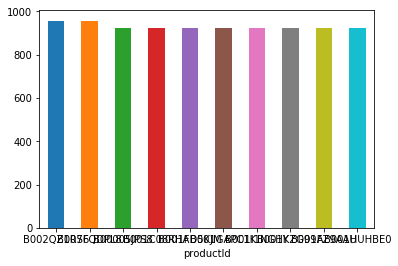

In [59]:
top_ten_movies.plot.bar(x='productId',rot=0)

In [64]:
Five_movies=['B000H7I6CU','B004SIPA0A','B004WMKSH2', 'B001I1NGHY', 'B002LBKDYE']

In [65]:
new_df= df[df.productId.isin(Five_movies)]

In [66]:
new_df.shape

(4366, 5)

In [67]:
new_df=pd.DataFrame(data=new_df)

In [68]:
new_df.head()

,productId,userId,score,summary,review
111469,B002LBKDYE,A1D3RZRRITKB75,5.0,If you eat you need to watch it.,Seriously ----watch this before you take that ...
111470,B002LBKDYE,A24Y3JBTJD5R1K,5.0,For those who eat food!,"I don't know that my eating habits changed, bu..."
111471,B002LBKDYE,ABND7UR0H37JW,5.0,"if you're a parent, don't miss this","Well worth the time, this engrossing and enlig..."
111472,B002LBKDYE,A3EK4NS9CMXC7W,5.0,"I'm not an activist, but I do want to live a ...",When movies like this come out I am often hesi...
111473,B002LBKDYE,A1LIDERT7U0NN8,5.0,Well Worth Your Time,I am always hesitant to watch certain document...


In [89]:
dictionary_movie = {'B000H7I6CU':'Cars','B004SIPA0A':'Sin City','B004WMKSH2':'Harry Potter 7', 'B001I1NGHY':'Iron Man', 'B002LBKDYE':'Food, Inc'}

In [90]:
new_df['movie_title'] = new_df['productId'].map(dictionary_movie)

In [91]:
new_df.to_csv("five_movies.csv")

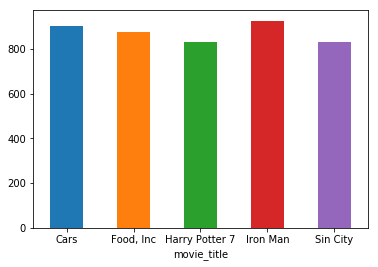

In [92]:
temp=new_df.groupby('movie_title')['movie_title'].count()
temp.plot.bar(x='movie_title',rot=0)

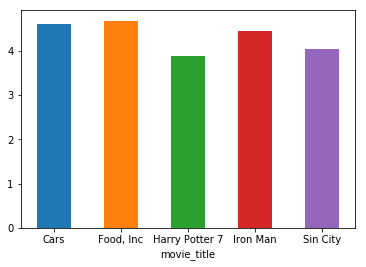

In [93]:
temp=new_df.groupby('movie_title')['score'].mean()
temp.plot.bar(x='movie_title',rot=0)

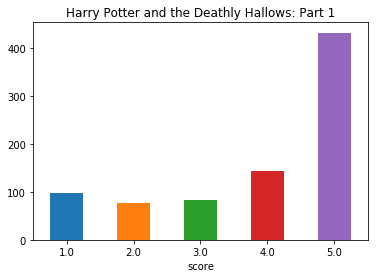

In [108]:
temp=new_df[new_df['movie_title']=='Harry Potter 7'].groupby('score')['score'].count()
temp.plot.bar(x='score',rot=0, title='Harry Potter and the Deathly Hallows: Part 1')



In [100]:
print(temp)

score
1.0     98
2.0     76
3.0     83
4.0    143
5.0    432
Name: score, dtype: int64


In [ ]:
df.groupby('productId').productId

In [42]:
new_df.to_csv("iron_man.csv")

In [ ]:
new_df

In [9]:
df.to_csv("output.csv")

In [ ]:
temp=df.groupby('userId')['score'].count()
temp.plot.bar(x='userId',rot=0)

productId
0001I55P6    4.650000
0009S4IO2    4.692308
000GRUN4A    2.600000
000W95OY6    2.746269
002KYIAL0    3.827586
003A3PGF8    4.500000
003E74KRK    5.000000
003F32YGC    4.857143
003FZW7VC    5.000000
003S1UNZA    3.634146
003S1UNZU    4.557895
004CZOZGY    5.000000
004IN21VQ    4.250000
304026668    3.000000
304952198    3.666667
305839670    4.500000
59668464X    5.000000
Name: score, dtype: float64


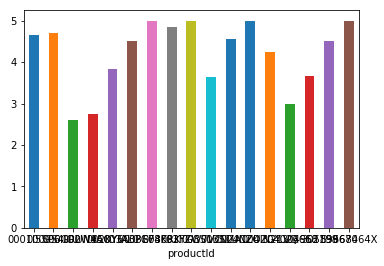

In [240]:
temp=df.groupby('productId')['score'].mean()
print(temp)
temp.plot.bar(x='productId',rot=0)

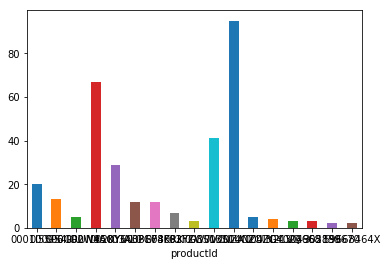

In [237]:
temp=df.groupby('productId')['score'].count()
temp.plot.bar(x='productId',rot=0)

In [67]:
filepath = "temp.txt"
with open(filepath) as fp:
   line = fp.readline()
   cnt = 1
   while line:
       print("Line {}: {}".format(cnt, line.strip()))
       line = fp.readline()
       cnt += 1

Line 1: product/productId: B003AI2VGA
Line 2: review/userId: A141HP4LYPWMSR
Line 3: review/profileName: Brian E. Erland "Rainbow Sphinx"
Line 4: review/helpfulness: 7/7
Line 5: review/score: 3.0
Line 6: review/time: 1182729600
Line 7: review/summary: "There Is So Much Darkness Now ~ Come For The Miracle"
Line 8: review/text: Synopsis: On the daily trek from Juarez, Mexico to El Paso, Texas an ever increasing number of female workers are found raped and murdered in the surrounding desert. Investigative reporter Karina Danes (Minnie Driver) arrives from Los Angeles to pursue the story and angers both the local police and the factory owners who employee the undocumented aliens with her pointed questions and relentless quest for the truth.<br /><br />Her story goes nationwide when a young girl named Mariela (Ana Claudia Talancon) survives a vicious attack and walks out of the desert crediting the Blessed Virgin for her rescue. Her story is further enhanced when the "Wounds of Christ" (stig

In [113]:
with open("temp.txt") as f:
    content = f.readline()
    print(content)

In [103]:
f = open("movies.txt", "r")
content = f.read()
print(content)
splitcontent = content.splitlines()
print(len(splitcontent))

OSError: [Errno 22] Invalid argument

In [20]:
f = open('movies.txt')
for line in f:
    print(line)
f.close()

In [35]:
import numpy as np

wordset = np.genfromtxt(fname='temp.txt')

OSError: temp.txt not found.

In [24]:
i
data = pd.read_csv('movies.txt', sep="", header=None)
#data.columns = ["a", "b", "c", "etc."]


ValueError: only single character unicode strings can be converted to Py_UCS4, got length 0

In [26]:
df=pd.read_table('movies.txt',header=None)

EmptyDataError: No columns to parse from file

In [25]:
movie=pd.read_fwf('movies.txt')

EmptyDataError: No rows from which to infer column width

In [27]:
with open('movies.json', 'w') as json_file:
    json.dump('movies.txt', json_file)

NameError: name 'json' is not defined

In [28]:
import gzip
import simplejson
from tqdm import tqdm
from utils import get_line_number

def parse(filename, total):
  f = gzip.open(filename, 'r')
  entry = {}
  for l in tqdm(f, total=total):
    l = l.strip()
    colonPos = l.find(':')
    if colonPos == -1:
      yield entry
      entry = {}
      continue
    eName = l[:colonPos]
    rest = l[colonPos+2:]
    entry[eName] = unicode(rest, errors='ignore')
  yield entry


if __name__ == '__main__':
  file_path = "data/movies.txt.gz"
  line_num = get_line_number(file_path)

  for e in parse(file_path, total=line_num):
    print(simplejson.dumps(e))

ModuleNotFoundError: No module named 'simplejson'

In [29]:
import json
with open("movies.txt", "rb") as fin:
    content = json.load(fin)
with open("stringJson.txt", "wb") as fout:
    json.dump(content, fout, indent=1)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)